In [95]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os

In [96]:
# leitura da imagem
path0 = os.path.join('..', 'Fotos_stellarium', 'Fotos', 'Triangulum Australe.png')
path1 = "test1.jpeg"
path2 = "test2.jpeg"

image = cv.imread(path1) 
image_of = cv.imread(path1)

if image is None: 
    print("Erro: Não foi possível carregar a imagem.")

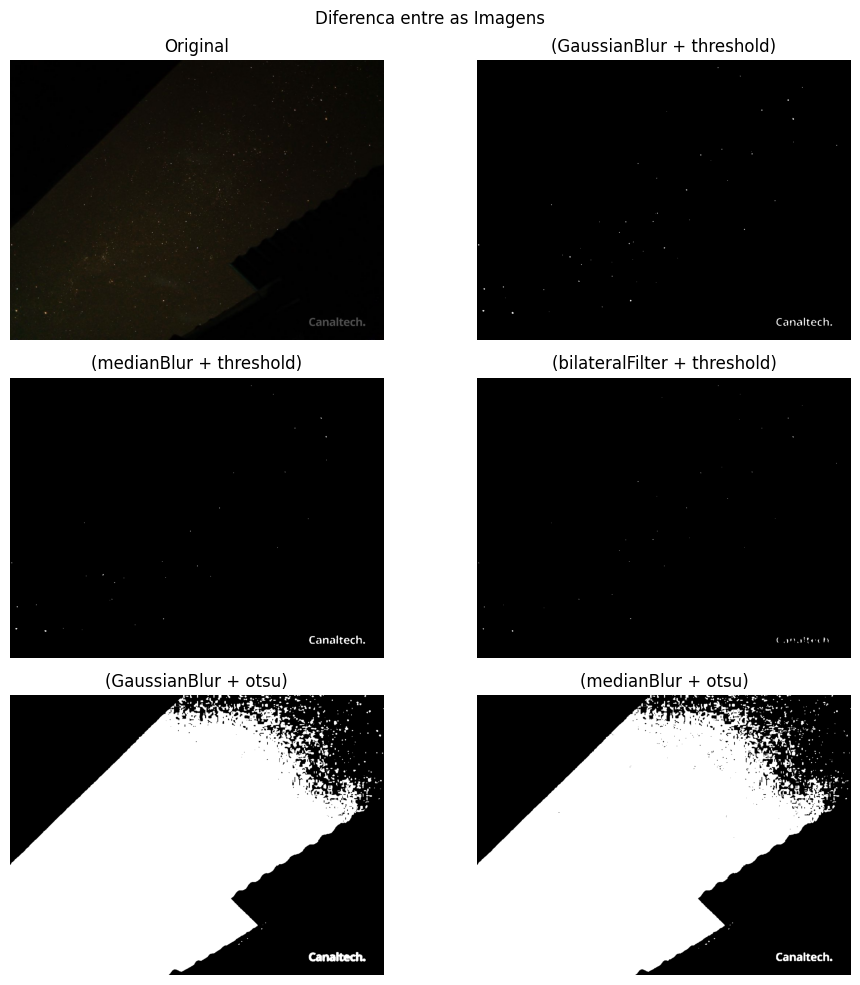

In [97]:
# pre processamento das imagens

# trocando a escala da imagens de BGR para Gray 
img_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY) 

# aplicacao de filtros para remocao de ruidos 
blur1 = cv.GaussianBlur(img_gray, (5,5), 0)
blur2 = cv.medianBlur(img_gray, 3)
blur3 = cv.bilateralFilter(img_gray,9,75,75)

# threshold (binarizacao) com um valor limiar especifico
valor_limiar = 60
_, img_t1 = cv.threshold(blur1, valor_limiar, 255, cv.THRESH_BINARY)
_, img_t2 = cv.threshold(blur2, valor_limiar, 255, cv.THRESH_BINARY)
_, img_t3 = cv.threshold(blur3, valor_limiar, 255,cv.THRESH_BINARY)

# otsu threshold 
_, img_t4 = cv.threshold(blur1,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
_, img_t5 = cv.threshold(blur2,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

# plotagem das imagens
fig, axs = plt.subplots(3, 2, figsize=(10, 10))
fig.suptitle('Diferenca entre as Imagens')

axs[0, 0].imshow(image)
axs[0, 0].set_title('Original')
axs[0, 0].axis('off')

axs[0, 1].imshow(img_t1, cmap='gray')
axs[0, 1].set_title('(GaussianBlur + threshold)')
axs[0, 1].axis('off')

axs[1, 0].imshow(img_t2, cmap='gray')
axs[1, 0].set_title('(medianBlur + threshold)')
axs[1, 0].axis('off')

axs[1, 1].imshow(img_t3, cmap='gray')
axs[1, 1].set_title('(bilateralFilter + threshold)')
axs[1, 1].axis('off')

axs[2, 0].imshow(img_t4, cmap='gray')
axs[2, 0].set_title('(GaussianBlur + otsu)')
axs[2, 0].axis('off')

axs[2, 1].imshow(img_t5, cmap='gray')
axs[2, 1].set_title('(medianBlur + otsu)')
axs[2, 1].axis('off')

plt.tight_layout()
plt.show()


Coordenadas das principais estrelas identificadas:

(969, 726)
(841, 724)
(936, 720)
(920, 718)
(883, 721)
(864, 719)
(848, 719)
(905, 719)
(824, 718)
(954, 718)
(896, 717)
(96, 693)
(17, 687)
(342, 676)
(420, 659)
(182, 629)
(19, 627)
(71, 622)
(278, 606)
(369, 592)
(285, 560)
(254, 539)
(512, 514)
(4, 506)
(416, 503)
(427, 498)
(389, 472)
(731, 464)
(407, 443)
(481, 442)
(493, 419)
(203, 396)
(815, 385)
(573, 355)
(491, 323)
(440, 283)
(612, 260)
(752, 257)
(670, 244)
(984, 233)
(865, 161)
(779, 137)
(851, 109)
(890, 74)
(720, 43)
(659, 20)


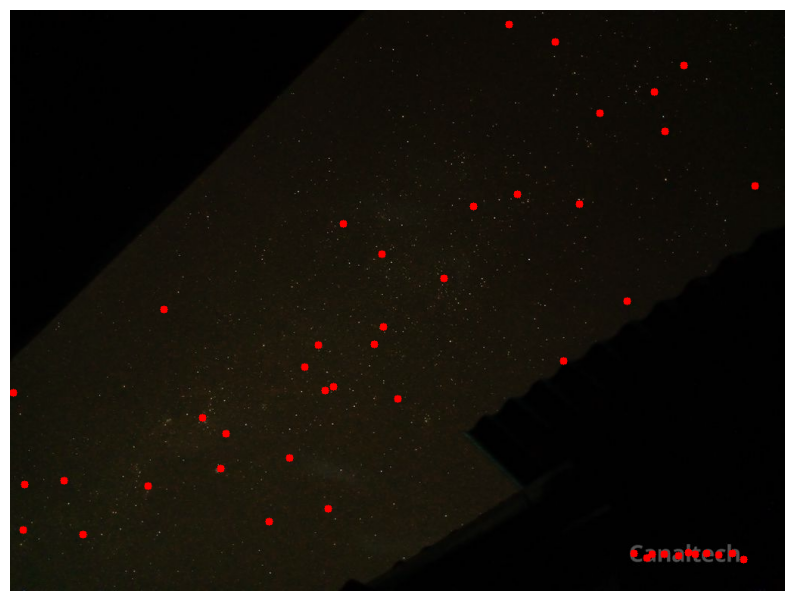

In [98]:
# encontrar contornos das estrelas
contours, _ = cv.findContours(img_t1, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# inicializar uma lista para armazenar as coordenadas dos pontos de interesse
keypoints = []

# adicionar os pontos de interesse dos contornos
for contour in contours:
    M = cv.moments(contour)
    if M["m00"] != 0:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
        keypoints.append((cX, cY))

# exibir as estrelas detectadas
print("Coordenadas das principais estrelas identificadas:\n")
for kp in keypoints:
    cv.circle(image_of, kp, 5, (255, 0, 0), -1)
    print(kp)

plt.figure(figsize=(10, 10)) 
plt.imshow(image_of)
plt.axis('off')
plt.show()

